In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
df = pd.read_csv('TOTALNSA.csv', index_col='DATE', parse_dates = True)

In [3]:
df.head()

,TOTALNSA
DATE,
1976-01-01,885.2
1976-02-01,994.7
1976-03-01,1243.6
1976-04-01,1191.2
1976-05-01,1203.2


In [4]:
df.index

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
               '1976-09-01', '1976-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='DATE', length=522, freq=None)

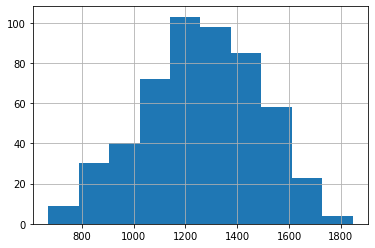

In [5]:
df['TOTALNSA'].hist()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 1976-01-01 to 2019-06-01
Data columns (total 1 columns):
TOTALNSA    522 non-null float64
dtypes: float64(1)
memory usage: 8.2 KB


# Data Exploratory Analysis

In [7]:
df.dropna().head()

,TOTALNSA
DATE,
1976-01-01,885.2
1976-02-01,994.7
1976-03-01,1243.6
1976-04-01,1191.2
1976-05-01,1203.2


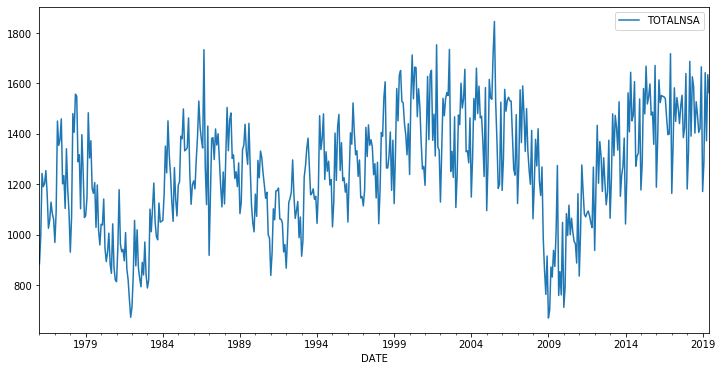

In [8]:
df.plot(figsize = (12,6))

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

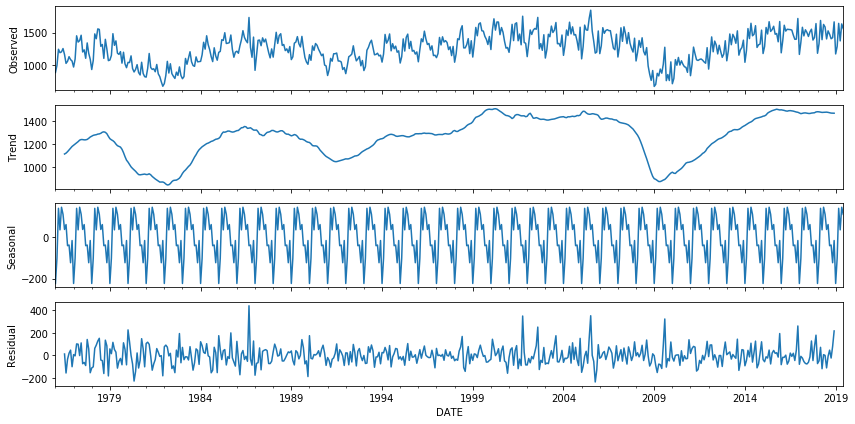

In [10]:
#ETS Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['TOTALNSA'], model='additive')
result.plot(); 

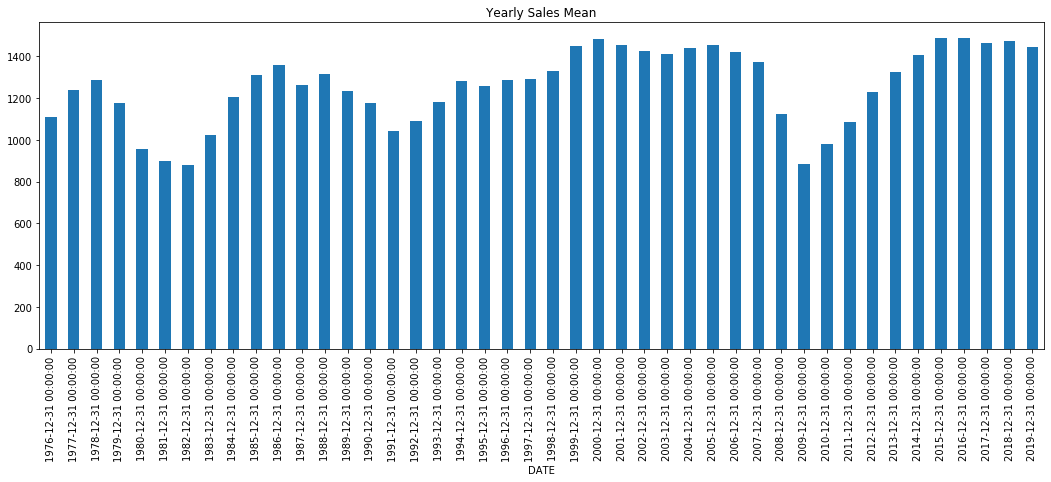

In [11]:
plt.figure(figsize = (18,6))

df['TOTALNSA'].resample('A').mean().plot.bar(title='Yearly Sales Mean');

In [12]:
df.index.freq = 'MS'

In [13]:
df.index

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
               '1976-09-01', '1976-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='DATE', length=522, freq='MS')

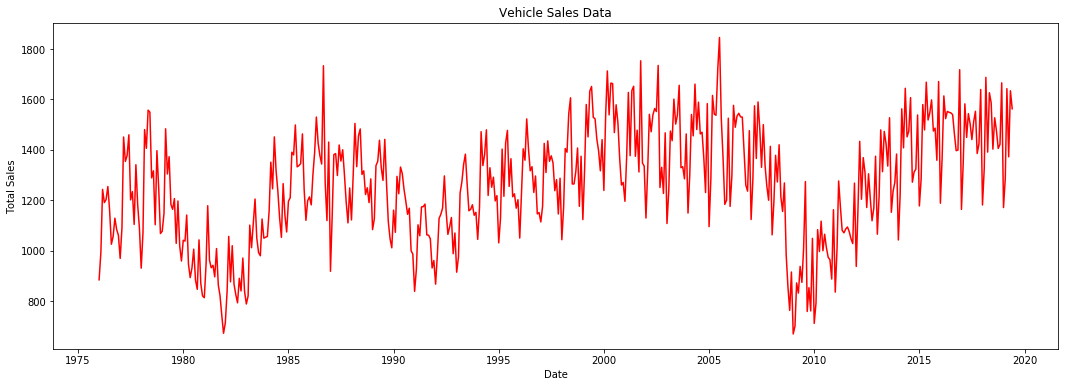

In [18]:
plt.figure(figsize = (18,6))
plt.plot('TOTALNSA', 'r',data=df)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Vehicle Sales Data')
plt.show()

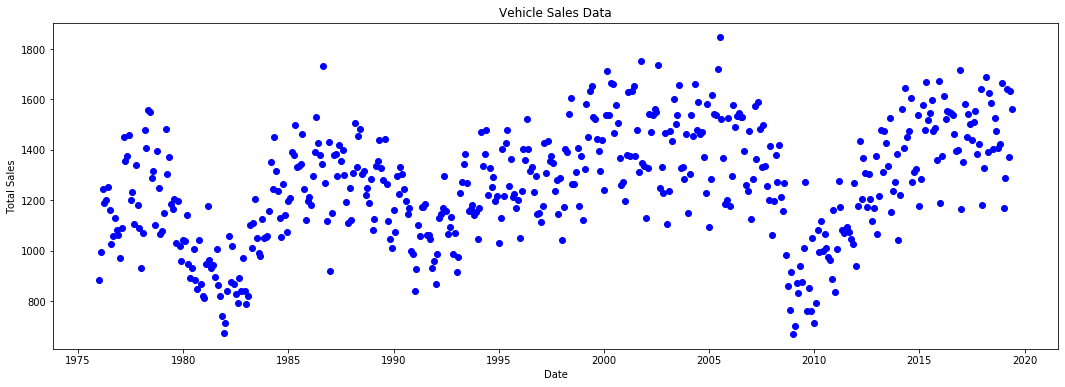

In [16]:
plt.figure(figsize = (18,6))
plt.plot('TOTALNSA', 'bo',data=df)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Vehicle Sales Data')
plt.show()

# Weighted Moving Average

In [24]:
#Exponential Weighted Moving Average
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['TOTALNSA'].ewm(alpha=alpha,adjust=False).mean()
df.head()

,TOTALNSA,EWMA12
DATE,,
1976-01-01,885.2,885.200000
1976-02-01,994.7,902.046154
1976-03-01,1243.6,954.592899
1976-04-01,1191.2,990.993992
1976-05-01,1203.2,1023.641070


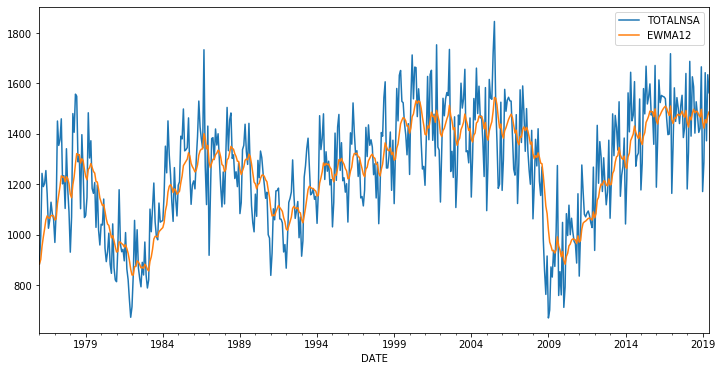

In [25]:
df[['TOTALNSA','EWMA12']].plot()

In [26]:
#Single Exponenetial Smoothing
model = SimpleExpSmoothing(df['TOTALNSA'])
fitted_model = model.fit(smoothing_level = alpha, optimized=False)
df['SES12']=fitted_model.fittedvalues.shift(0)
df.head()

,TOTALNSA,EWMA12,SES12
DATE,,,
1976-01-01,885.2,885.200000,885.200000
1976-02-01,994.7,902.046154,885.200000
1976-03-01,1243.6,954.592899,902.046154
1976-04-01,1191.2,990.993992,954.592899
1976-05-01,1203.2,1023.641070,990.993992


In [27]:
#Double Exponential Smoothing Additive
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df['TOTALNSA'], trend='add').fit()
df['DES12_add']=model.fittedvalues.shift(0)
df.head()

,TOTALNSA,EWMA12,SES12,DES12_add
DATE,,,,
1976-01-01,885.2,885.200000,885.200000,991.768915
1976-02-01,994.7,902.046154,885.200000,947.887132
1976-03-01,1243.6,954.592899,902.046154,968.621357
1976-04-01,1191.2,990.993992,954.592899,1085.476265
1976-05-01,1203.2,1023.641070,990.993992,1131.028204


In [28]:
#Double Exponential Smoothing Multiplicative
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df['TOTALNSA'], trend='mul').fit()
df['DES12_mul']=model.fittedvalues.shift(0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 1976-01-01 to 2019-06-01
Freq: MS
Data columns (total 5 columns):
TOTALNSA     522 non-null float64
EWMA12       522 non-null float64
SES12        522 non-null float64
DES12_add    522 non-null float64
DES12_mul    522 non-null float64
dtypes: float64(5)
memory usage: 44.5 KB


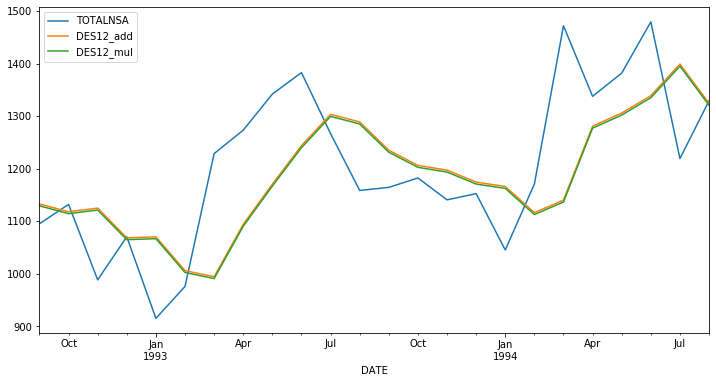

In [30]:
df[['TOTALNSA', 'DES12_add', 'DES12_mul']].iloc[200:224].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [31]:
#Triple Exponential Smoothing Additive
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df['TOTALNSA'], trend='add', seasonal = 'add',seasonal_periods = 12).fit()
df['TES12_add']=model.fittedvalues
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 1976-01-01 to 2019-06-01
Freq: MS
Data columns (total 6 columns):
TOTALNSA     522 non-null float64
EWMA12       522 non-null float64
SES12        522 non-null float64
DES12_add    522 non-null float64
DES12_mul    522 non-null float64
TES12_add    522 non-null float64
dtypes: float64(6)
memory usage: 48.5 KB


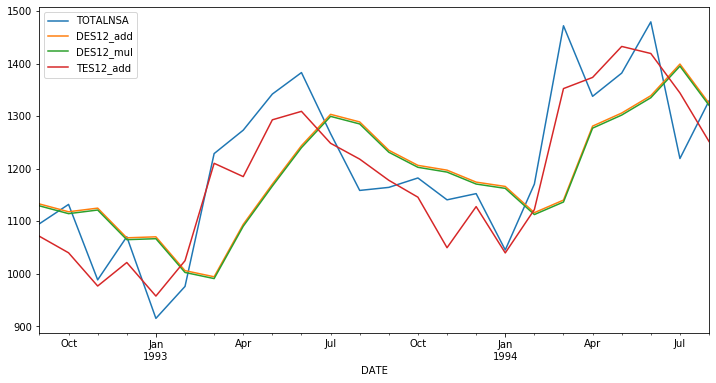

In [33]:
df[['TOTALNSA', 'DES12_add', 'DES12_mul', 'TES12_add']].iloc[200:224].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [34]:
#Triple Exponential Smoothing Multiplicative
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df['TOTALNSA'], trend='mul', seasonal = 'mul',seasonal_periods = 12).fit()
df['TES12_mul']=model.fittedvalues.shift(0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 1976-01-01 to 2019-06-01
Freq: MS
Data columns (total 7 columns):
TOTALNSA     522 non-null float64
EWMA12       522 non-null float64
SES12        522 non-null float64
DES12_add    522 non-null float64
DES12_mul    522 non-null float64
TES12_add    522 non-null float64
TES12_mul    522 non-null float64
dtypes: float64(7)
memory usage: 52.6 KB


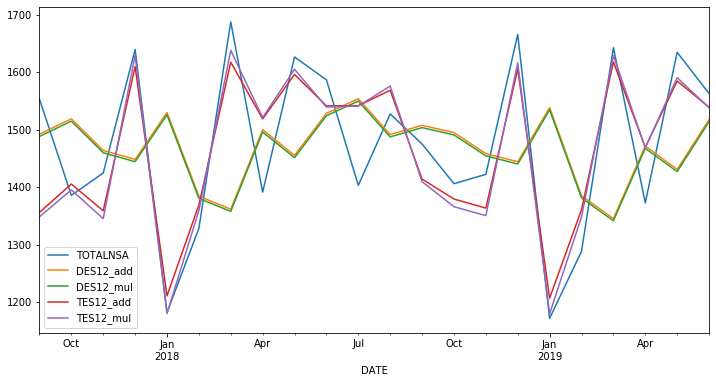

In [35]:
df[['TOTALNSA', 'DES12_add', 'DES12_mul', 'TES12_add', 'TES12_mul']].iloc[500:540].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [36]:
Check = df.drop(['EWMA12','SES12','DES12_add','DES12_mul','TES12_add','TES12_mul'], axis = 1)

In [37]:
Check.head()

,TOTALNSA
DATE,
1976-01-01,885.2
1976-02-01,994.7
1976-03-01,1243.6
1976-04-01,1191.2
1976-05-01,1203.2


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 1976-01-01 to 2019-06-01
Freq: MS
Data columns (total 7 columns):
TOTALNSA     522 non-null float64
EWMA12       522 non-null float64
SES12        522 non-null float64
DES12_add    522 non-null float64
DES12_mul    522 non-null float64
TES12_add    522 non-null float64
TES12_mul    522 non-null float64
dtypes: float64(7)
memory usage: 52.6 KB


# Fitting and Predicting using TES additive

In [39]:
train_data = Check.loc[:'2018-06-01'] 
test_data = Check.loc['2018-07-01':]

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [56]:
#Triple Exponential Smoothing Additive
fitted_model = ExponentialSmoothing(train_data['TOTALNSA'],
                                    trend = 'add',
                                   seasonal = 'mul',
                                   seasonal_periods = 12).fit()

In [57]:
test_predictions = fitted_model.forecast(12).rename('HW Forecast')

In [58]:
test_predictions

2018-07-01    1543.973707
2018-08-01    1630.491626
2018-09-01    1470.305615
2018-10-01    1404.646444
2018-11-01    1373.005160
2018-12-01    1613.554855
2019-01-01    1166.713277
2019-02-01    1337.651197
2019-03-01    1642.138902
2019-04-01    1477.876198
2019-05-01    1638.234694
2019-06-01    1561.431249
Freq: MS, Name: HW Forecast, dtype: float64

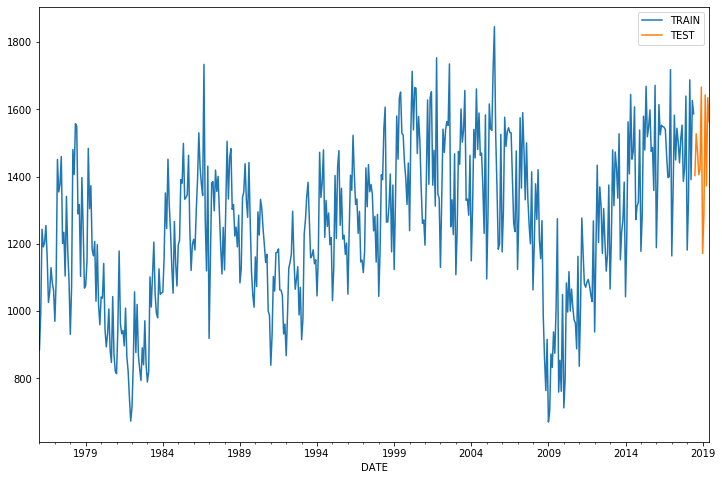

In [59]:
train_data['TOTALNSA'].plot(legend=True,label='TRAIN')
test_data['TOTALNSA'].plot(legend=True,label='TEST',figsize=(12,8));

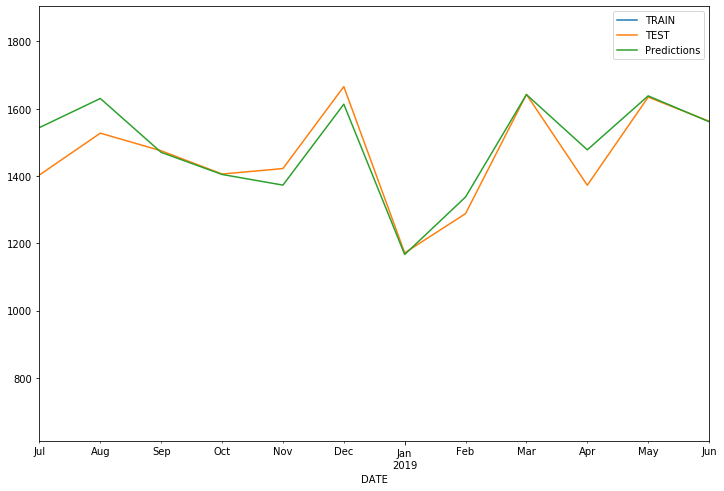

In [60]:
train_data['TOTALNSA'].plot(legend=True,label='TRAIN')
test_data['TOTALNSA'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True, label='Predictions', xlim = ['2018-07','2019-06'])

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [62]:
test_data.describe()

,TOTALNSA
count,12.000000
mean,1464.366417
std,150.557098
min,1171.540000
25%,1395.503250
50%,1448.608000
75%,1580.919750
max,1665.906000


In [63]:
mean_absolute_error(test_data,test_predictions)

43.062576628221905

In [64]:
mean_squared_error(test_data,test_predictions)

4099.935518300656

In [65]:
np.sqrt(mean_squared_error(test_data,test_predictions))

64.03073885487076

In [66]:
final_model = ExponentialSmoothing(Check['TOTALNSA'],trend='add',
                                   seasonal='add',seasonal_periods=12).fit()

In [67]:
forecast_predictions = final_model.forecast(12)

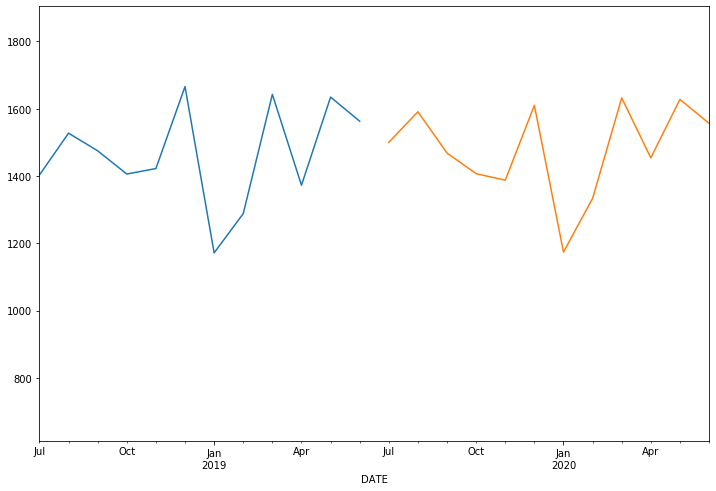

In [68]:
Check['TOTALNSA'].plot(figsize=(12,8))
forecast_predictions.plot(xlim = ['2018-07','2020-06']);

In [69]:
forecast_predictions

2019-07-01    1500.130240
2019-08-01    1591.058744
2019-09-01    1468.363990
2019-10-01    1406.894714
2019-11-01    1387.599762
2019-12-01    1610.159225
2020-01-01    1174.065905
2020-02-01    1333.545773
2020-03-01    1632.317734
2020-04-01    1453.948229
2020-05-01    1627.822230
2020-06-01    1556.709215
Freq: MS, dtype: float64

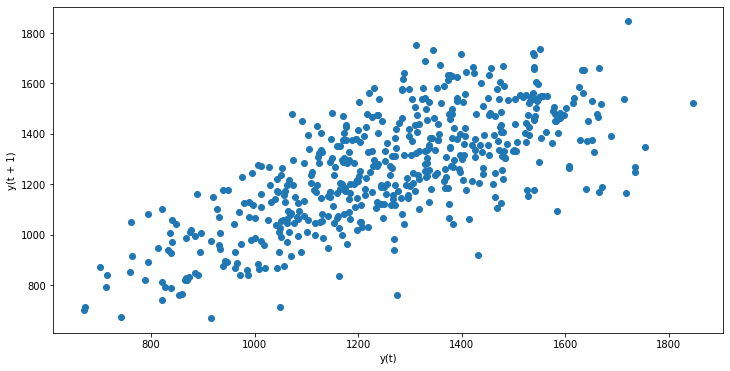

In [70]:
from pandas.plotting import lag_plot

lag_plot(Check['TOTALNSA']);

# Check for Seasonality and Trend

In [71]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

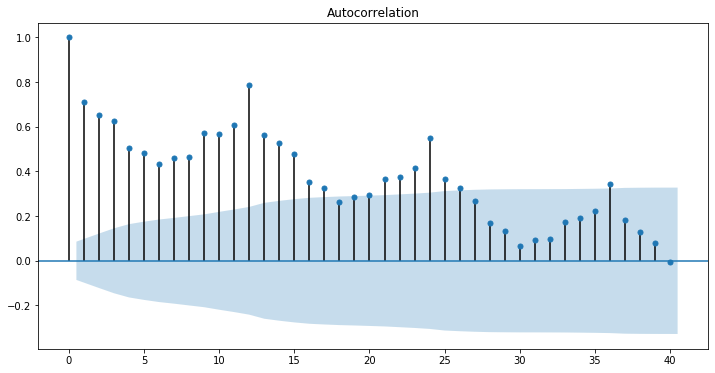

In [72]:
plot_acf(Check, lags=40);

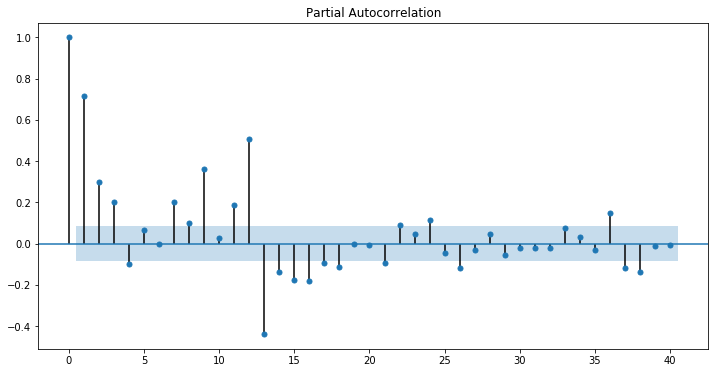

In [73]:
plot_pacf(Check, lags=40);

In [74]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [75]:
adf_test(Check['TOTALNSA'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.999320
p-value                   0.034958
# lags used              17.000000
# observations          504.000000
critical value (1%)      -3.443392
critical value (5%)      -2.867292
critical value (10%)     -2.569833
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# AR Model selection, fitting and prediction

In [76]:
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
model = AR(train_data['TOTALNSA'])
ARfit = model.fit(method='mle',ic='t-stat')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 18
Coefficients:
const           96.594942
L1.TOTALNSA      0.388561
L2.TOTALNSA      0.105814
L3.TOTALNSA      0.130575
L4.TOTALNSA      0.086822
L5.TOTALNSA      0.070313
L6.TOTALNSA     -0.003314
L7.TOTALNSA      0.017516
L8.TOTALNSA     -0.025264
L9.TOTALNSA      0.132813
L10.TOTALNSA    -0.045082
L11.TOTALNSA     0.044916
L12.TOTALNSA     0.659193
L13.TOTALNSA    -0.280185
L14.TOTALNSA    -0.020443
L15.TOTALNSA    -0.048209
L16.TOTALNSA    -0.149967
L17.TOTALNSA    -0.044437
L18.TOTALNSA    -0.096780
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [78]:
start = len(train_data)
end = len(train_data)+len(test_data)-1
rename = f'AR(18) Predictions'

predictions18 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

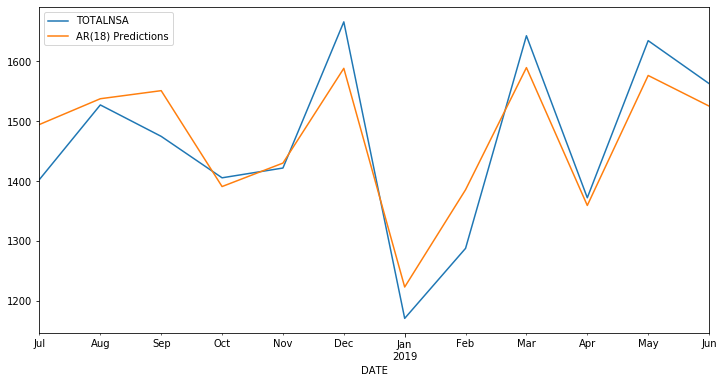

In [79]:
test_data['TOTALNSA'].plot(legend=True)

predictions18.plot(legend=True,figsize=(12,6));

In [80]:
from sklearn.metrics import mean_squared_error

labels = ['AR(18)']
preds = [predictions18]  

for i in range(1):
    error = mean_squared_error(test_data['TOTALNSA'], preds[i])
    print(f'{labels[i]} MSE: {error:11.10}')

AR(18) MSE: 3387.582539


In [81]:
print(np.sqrt(mean_squared_error(test_data['TOTALNSA'], predictions18)))

58.20294270064577


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


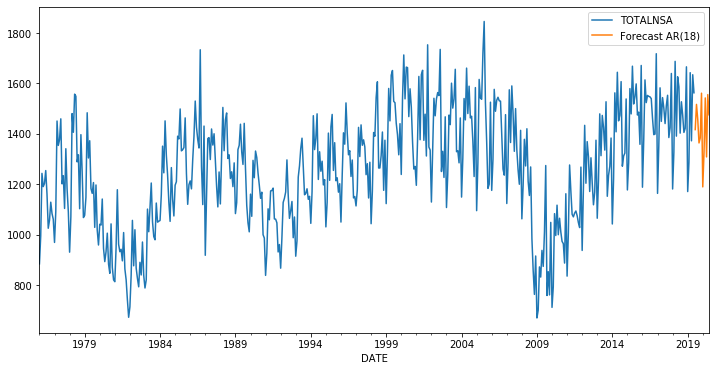

In [82]:
# First, retrain the model on the full dataset
model = AR(Check['TOTALNSA'])

# Next, fit the model
ARfit = model.fit(method='mle')

# Make predictions
fcast = ARfit.predict(start=len(Check), end=len(Check)+11, dynamic=False).rename('Forecast AR(18)')

# Plot results
Check['TOTALNSA'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));



In [83]:
from pmdarima import auto_arima 

# Check for SARIMAX

In [84]:
auto_arima(Check['TOTALNSA'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  522
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3340.814
Date:                Sun, 01 Sep 2019   AIC                           6689.627
Time:                        17:32:00   BIC                           6706.650
Sample:                             0   HQIC                          6696.295
                                - 522                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5457      1.011      0.540      0.589      -1.436       2.527
ar.L1          0.3047      0.063      4.857      0.000       0.182       0.428
ma.L1         -0.8497      0.034    -25.325      0.000      -0.915      -0.784
sigma2      2.169e+04   1400.791     15.486      0.000    1.89e+04    2.44e+04
===================================================================================
Ljung-Box (Q):                      865.63   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.00   Prob(JB):                         0.67
Heteroskedasticity (H):               1.53   Skew:                            -0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
model = SARIMAX(train_data['TOTALNSA'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:               TOTALNSA   No. Observations:                  510
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3261.439
Date:                Sun, 01 Sep 2019   AIC                           6528.879
Time:                        17:32:33   BIC                           6541.576
Sample:                    01-01-1976   HQIC                          6533.857
                         - 06-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3199      0.063      5.085      0.000       0.197       0.443
ma.L1         -0.8498      0.034    -24.855      0.000      -0.917      -0.783
sigma2      2.149e+04   1396.177     15.390      0.000    1.88e+04    2.42e+04
===================================================================================
Ljung-Box (Q):                      829.28   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.00   Prob(JB):                         0.71
Heteroskedasticity (H):               1.49   Skew:                            -0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,1)Predictions')

In [87]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data['TOTALNSA'][i]}")


predicted=1530.876735, expected=1403.118
predicted=1513.028237, expected=1527.4160000000002
predicted=1507.317814, expected=1474.997
predicted=1505.490829, expected=1405.908
predicted=1504.906307, expected=1422.219
predicted=1504.719295, expected=1665.906
predicted=1504.659463, expected=1171.54
predicted=1504.64032 , expected=1288.278
predicted=1504.634196, expected=1642.751
predicted=1504.632236, expected=1372.6589999999999
predicted=1504.63161 , expected=1634.568
predicted=1504.631409, expected=1563.037


In [88]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data['TOTALNSA'], predictions)
print(f'SARIMA(1,1,1) RMSE: {error:11.10}')

SARIMA(1,1,1) RMSE: 151.3489668


# FB Prophet

In [89]:
from fbprophet import Prophet


In [90]:
fb = pd.read_csv('TOTALNSA.csv')

In [91]:
fb.head()

,DATE,TOTALNSA
0,1976-01-01,885.2
1,1976-02-01,994.7
2,1976-03-01,1243.6
3,1976-04-01,1191.2
4,1976-05-01,1203.2


In [92]:
fb.columns = ['ds','y']


In [93]:
fb['ds'] = pd.to_datetime(fb['ds'])

In [94]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 2 columns):
ds    522 non-null datetime64[ns]
y     522 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 KB


In [95]:
len(fb)

522

In [96]:
len(fb) - 12

510

In [97]:
trainfb = fb.iloc[:510]
testfb = fb.iloc[510:]

In [133]:
m = Prophet()
m.add_seasonality(name='monthly', period=12, fourier_order=3, prior_scale=0.1)
m.fit(trainfb)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [134]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
517,2019-02-01,1494.654788,1203.570617,1582.773563,1493.800253,1495.117069,-110.073934,-110.073934,-110.073934,-8.632951,-8.632951,-8.632951,-101.440984,-101.440984,-101.440984,0.0,0.0,0.0,1384.580854
518,2019-03-01,1497.045278,1420.755750,1800.097168,1495.914973,1497.683750,117.632350,117.632350,117.632350,0.016532,0.016532,0.016532,117.615817,117.615817,117.615817,0.0,0.0,0.0,1614.677628
519,2019-04-01,1499.691893,1323.820170,1724.963400,1498.245297,1500.548527,31.286362,31.286362,31.286362,8.130779,8.130779,8.130779,23.155582,23.155582,23.155582,0.0,0.0,0.0,1530.978255
520,2019-05-01,1502.253133,1452.435207,1825.921988,1500.437754,1503.482434,137.614550,137.614550,137.614550,-1.723782,-1.723782,-1.723782,139.338331,139.338331,139.338331,0.0,0.0,0.0,1639.867682
521,2019-06-01,1504.899747,1409.024075,1816.304026,1502.528934,1506.483797,100.873278,100.873278,100.873278,-8.632951,-8.632951,-8.632951,109.506229,109.506229,109.506229,0.0,0.0,0.0,1605.773025


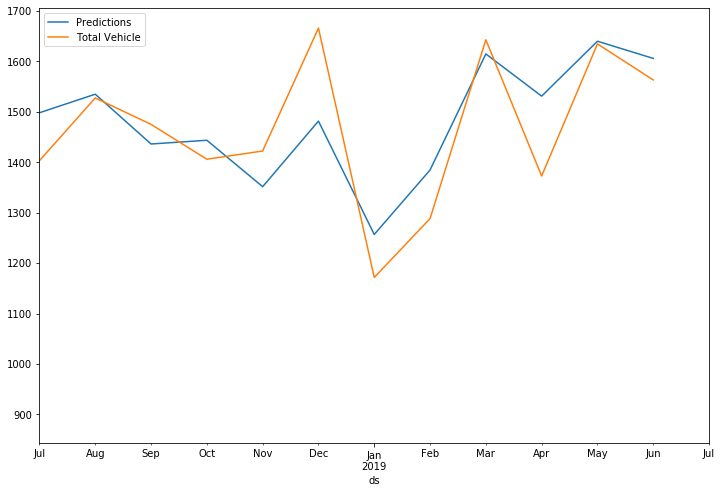

In [135]:
pd.plotting.register_matplotlib_converters() 

ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

testfb.plot(x='ds',y='y',label='Total Vehicle',legend=True,ax=ax,xlim=('2018-07-01','2019-07-01'))

In [136]:
predictionsfb = forecast.iloc[-12:]['yhat']

In [137]:
predictionsfb

510    1498.043832
511    1534.864907
512    1436.138771
513    1443.521583
514    1351.497766
515    1481.456798
516    1256.778078
517    1384.580854
518    1614.677628
519    1530.978255
520    1639.867682
521    1605.773025
Name: yhat, dtype: float64

In [138]:
testfb['y']

510    1403.118
511    1527.416
512    1474.997
513    1405.908
514    1422.219
515    1665.906
516    1171.540
517    1288.278
518    1642.751
519    1372.659
520    1634.568
521    1563.037
Name: y, dtype: float64

In [139]:
rmse(predictions,testfb['y'])

151.34896684562523

In [140]:
testfb.mean()

y    1464.366417
dtype: float64

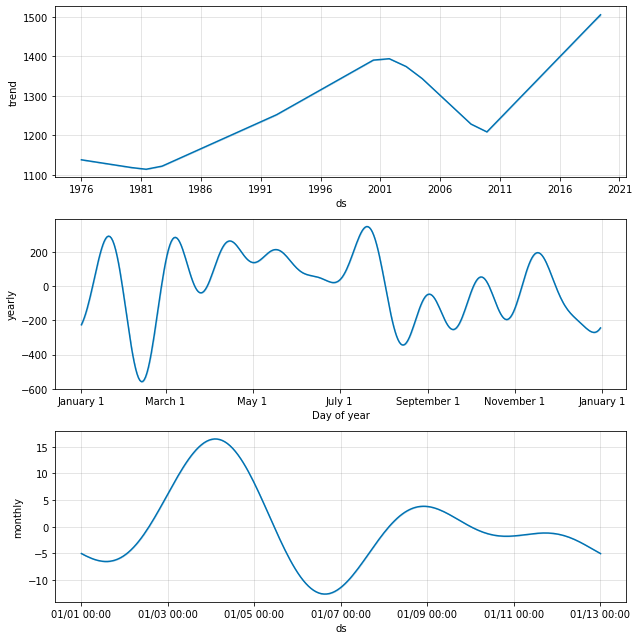

In [141]:
m.plot_components(forecast);

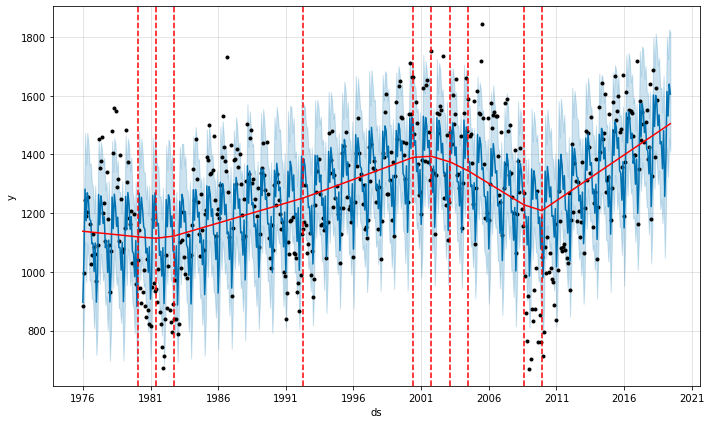

In [142]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


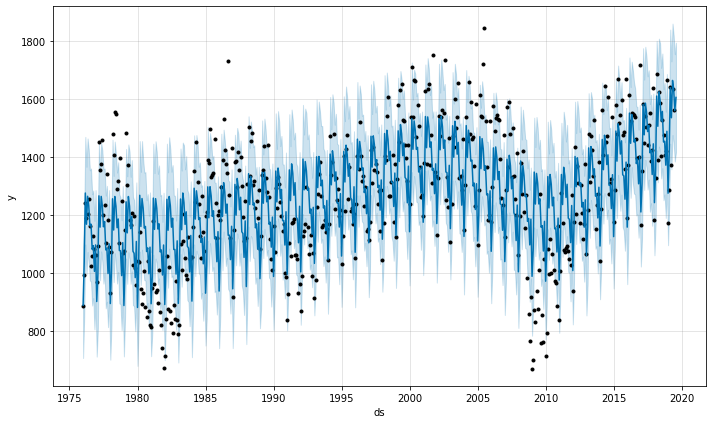

In [131]:
n = Prophet()
n.fit(fb)
forecast = n.predict(future)
fig = n.plot(forecast)

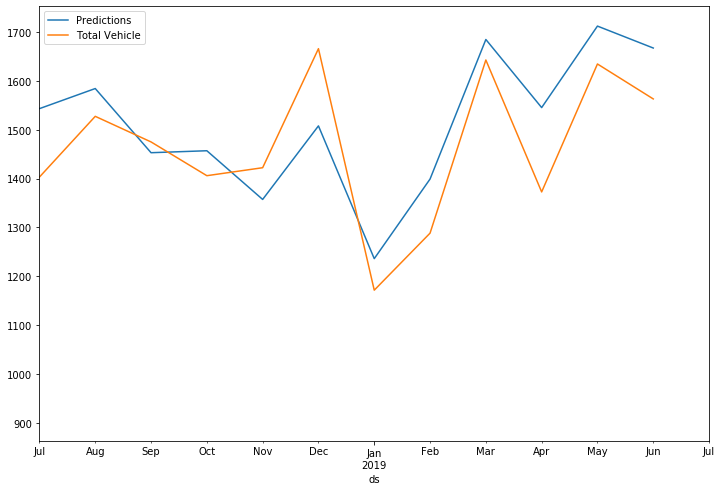

In [119]:
pd.plotting.register_matplotlib_converters() 

ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

testfb.plot(x='ds',y='y',label='Total Vehicle',legend=True,ax=ax,xlim=('2018-07-01','2019-07-01'))

In [120]:
rmse(predictions,testfb['y'])

151.34896684562523

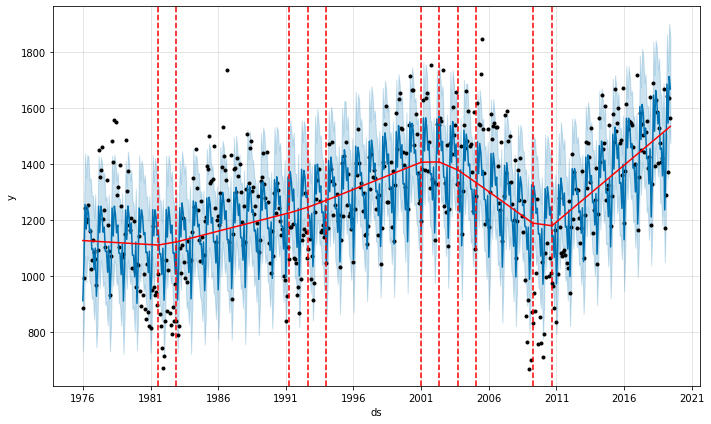

In [121]:
from fbprophet.plot import add_changepoints_to_plot
fig = n.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), n, forecast)

# Predciting Future Values

In [122]:
future = n.make_future_dataframe(periods=2,freq = 'MS')

In [123]:
fb.tail()

,ds,y
517,2019-02-01,1288.278
518,2019-03-01,1642.751
519,2019-04-01,1372.659
520,2019-05-01,1634.568
521,2019-06-01,1563.037


In [124]:
future.tail()

,ds
519,2019-04-01
520,2019-05-01
521,2019-06-01
522,2019-07-01
523,2019-08-01


In [125]:
forecast = m.predict(future)
forecast.tail()['yhat']

519    1548.916606
520    1670.819562
521    1643.512655
522    1569.609082
523    1611.179473
Name: yhat, dtype: float64

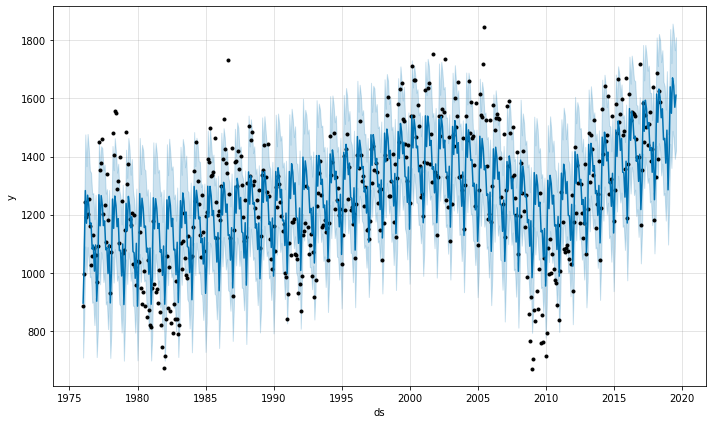

In [126]:
pd.plotting.register_matplotlib_converters() 
%matplotlib inline
m.plot(forecast);

(737150.0, 737272.0)

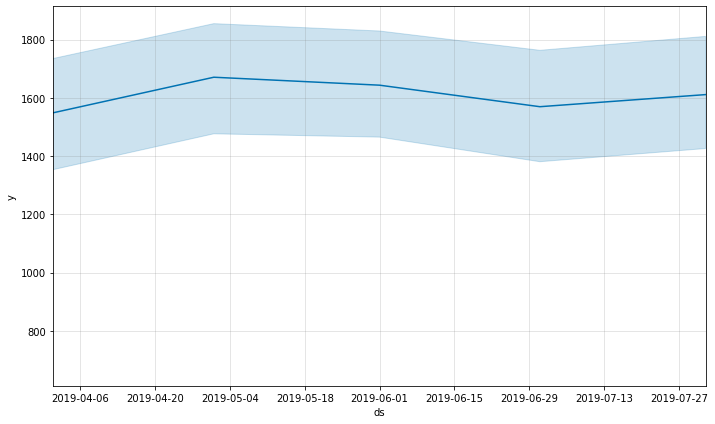

In [93]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2019-04-01','2019-08-01')